## 第三章：最小均方算法

### 1.判断题
１．ＬＭＳ算法中的神经元与Ｒｏｓｅｎｂｌａｔｔ感知器的区别是前者激活函数为线性激活函数，后者为阶跃函数
#### 对
２．ＬＭＳ算法使用批量梯度下降法优化代价函数并求解模型参数
#### 错，一般使用小批量梯度下降法或随机梯度下降法计算代价和估计梯度
３．最速下降法中的学习率通常是大约０小于１的值
#### 对
４．小批量学习中学习率应该设置小一些（相比于批量学习）以保证稳定性
#### 对
５．在线算法是指从连续产生样本的数据流中抽取样本，在训练时取小批量样本进行
#### 错，在训练时取一个样本进行
６．梯度下降法和牛顿法都是一阶优化法
#### 错，牛顿法是二阶优化法
７．使用梯度下降法等优化算法求解模型参数时，往往首先需要打乱原始样本数据的顺序
#### 对
８．通常的，小批量算法比批量算法运算迭代一次所需的计算机资源更少
#### 对

### ２．选择题
ＡＢＣＤ
A——模型由一个神经元构成
Ｂ——使用优化法可得到模型参数
Ｃ——模型参数的初始值是随机的
D——最小均方算法在更新参数时学习率过大可能导致模型无法收敛

### 3.简答题
1.从手写数字数据集MNIST中每次随机抽取32个样本完成一次训练
#### 小批量优化法
2.根据用户对购物网站访问实时生成的数据，训练用户对物品偏好的算法
#### 在线优化法
3.从搜集到的100个样本的房价数据集中训练模型估计房价，优化时每次取100个样本
#### 批量优化法

### 4.代码练习
尝试将上述LMS算法改为使用小批量数据训练，观察并对比收敛速度。

In [1]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

num_train = 1000
num_test = 100

# 制作数据集
data = make_regression(n_samples=num_train, n_features=2)

In [5]:
def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b

In [6]:
# 将数据集分割成为训练集与测试集
# 并将数据集转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

Text(0,0.5,'losses')

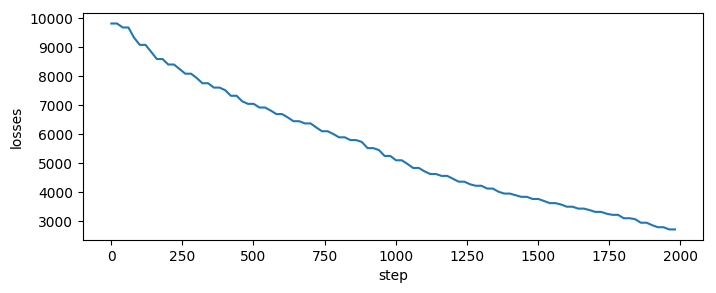

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt

train_steps = 2000    # 训练次数
lr =0.01                    # 学习率
summary_step = 20   # 摘要频率 
summary = []            # 摘要

W = np.random.randn(2)  # 初始化连接权重
b = 0                             # 初始化偏置值
tmp_W = 0    #计算每批W的和
tmp_b = 0    #计算每批b的和
for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    # 计算偏导数和偏置值
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    #计算tmp_W和tmp_b
    tmp_W = tmp_W + dW
    tmp_b = tmp_b + db
    
    #更新模型参数
    if i%32==31:
        W = W -lr*(tmp_W/32)
        b = b-lr*(tmp_b/32)
        tmp_W = 0
        tmp_b = 0
    
    #W = W - lr * dW
    #b = b - lr * db

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')